# Proceso generación de energía a través de una bicicleta


El presente trabajo busca estudiar el fenómeno de la producción de energía eléctrica a partir del uso de una bicicleta mediante pedaleos, que serán pasados a una batería para poder producir la luz de un gimnasio donde solo existe la posibilidad de generar el gimnasio completamente para abastecer las necesidades eléctricas a través de las bicis.

En un gimnasio promedio pueden generarse alrededor de 37,000 voltios por hora cuando se encuentra a pleno rendimiento, esto quiere decir que, gracias a ello, pueden satisfacerse las necesidades energéticas de las instalaciones.

Para acotar el caso de estudio el fenómeno se acotará a elegir si se puede abastecer de energía limpia el gimnasio o se tendrá que usar otra fuente usando numeros aleatorios


## Descripción del fenómeno

### Generación de energia

El proceso de generación de energia ocurre dentro de un establecimiento para hacer ejercicio (gimnasio) donde esta repleto de bicicletas estáticas, a la que se le conecta un generador, una banda de automóvil (con el que se unen las revoluciones de la bicicleta conectada al generador), y un inversor de corriente CDCA. La energía que genera la bicicleta cuando la usamos, se almacena y a partir de esta se pueden tranformar la energía en electricidad. 

Se debe aclarar que no a todas horas estará en uso constante la maquina para esto habran clases impartidas por maestros especializados en el tema. Habrá horas en las que no se podrán dar clases debido a que hay horarios no concurridos por la gente que tiene trabajo o compromisos.

### Descripción del tiempo

El proceso de generación de energía se considera de un proceso no tan largo si cada hora esta a su pleno rendimiento, al no estar lleno el gimnasio se usa la energía electrica del establecimiento y es un proceso primario, pero al estar al tope y generar la energía del establecimiento se convierte en un proceso binario.

La etapa final de la generación de energía es cuando no hay ningun usuario pedaleando cualquiera de las bicicletas, se considera cada hora como una unidad de tiempo y por tanto, consideramos el tiempo en que se desarrolla este fenómeno como discreto y finito.

El tiempo $T$ que usaremos es de 1 hora que es lo que dura la clase y es lo que queremos saber si podremos satisfacer las necesidades del gasto de energia del establecimiento.


### Usuarios

Los usuarios o número de usuarios en este tipo de elecciones forman parte de un conjunto binario. Para fines prácticos identificaremos el número de usuarios como A y B. A será 60 bicis o menos, B 61 bicis o más. Cada uno con el fin de generar la electricidad. 

Se establecen 60 ya que el numero de bicis totales es de 70 y el numero optimo para que es´ta pueda producir la energía del establecimiento son apartir de 60.

Una persona en promedio genera entre 400 y 600 voltios dependiendo la intensidad que le de a su entrenamiento.

 Además del tiempo en que los usuarios estén dispuestos a realizar el ejercicio, los usuarios pueden verse inmersos en generar o no la energía. Por ejemplo, poca motivación al momento de pedalear, poca energía, su alimentación, cansancio por trabajo, o que haya hecho ejercicio diferente antes de tomar la clase.
 


## Características del modelo

El modelo consta de una población $P$ constante de $N$ bicicletas que estarán en uso durante  $T$ minutos de clase. 
$T$ equivale a 60 minutos o bien 1 hora.



La intención de voltios generados por un usuario $i \in P$ está representada por la variable aleatoria $V_i(n) \in \{0,1\}$ (Representa si podria generarse o no la electricidad $n$). 


Entonces, $\{X_n: n \in \{1,2,\dots,T\} \}$ con $X_n = \sum\limits_{i = 1}^{N} V_i(n)$ representa la intención de bicis usadas por los usuarios A al día $n$.  Es evidente que $X_n \in [0,N]$.

La electricidad del establecimiento puede encontrarse en alguno de los siguientes 3 estados en un momento $n$ dado:
 1. 37000 voltios o menos. 
 2. 37000 voltios.
 3. 37000 voltios o más por B.
 
Estos estados serán representados de la siguiente manera en:

 1. $V_i(n)= 37000$ 
 2. $P(V_i(n)= 1) = p_i(n)$ 
 3. $V_i(n)= 0$
 
 Primero se hará una distribución normal de numeros aleatorios donde generando al azar los voltios que puede generar una persona en una hora.
 Después se hara una distribución exponencial de numeros aleatorios del gasto de voltios que se necesitan para generar la luz de una hora del establecimiento. 
 

In [17]:
#Generación de distribución binomial de números aleatorios
import numpy as np
aleatorios2 = np.random.normal(600,50,60)
aleatorios2
sum(aleatorios2)


#1=35760.26850001939
#2-36605.2732441534
#nbinomal= 100




363007149.1268276

<function matplotlib.pyplot.show(close=None, block=None)>

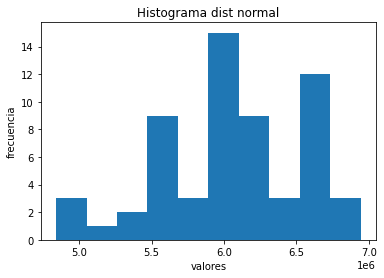

In [23]:
#Generamos un histograma de los datos anteriores
import matplotlib.pyplot as plt
grafnormal= plt.hist(aleatorios2)
plt.ylabel('frecuencia')
plt.xlabel('valores')
plt.title('Histograma dist normal')
plt.show

In [21]:
#Generaremos una distribución exponencial a traves de numeros aleatorios sobre el gasto de energia del gimnasio en una hora
import numpy as np
from scipy import stats
from scipy.stats import expon
#y es el gasto de voltios
y= expon.rvs(37000,700, size=1)
y
#tamaño 1
#el valor que me da lo comparo con el valor de la normal
#1= 37149.14786398



array([37226.83350732])

ValueError: x and y must have same first dimension, but have shapes (1,) and (1000,)

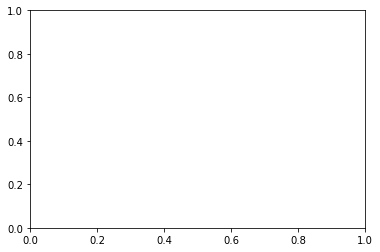

In [24]:
# Graficando la dist exponencial
exponencial=expon()
y= expon.rvs(34000,700, size=1)
x = np.linspace(expon.ppf(0.01),
                expon.ppf(0.99), 1000)
plt.plot(y,expon.pdf(x))

#https://medium.com/qu4nt/distribucion-exponencial-python-1d921a87f835

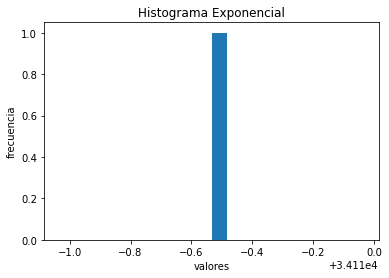

In [19]:
plt.hist(y,20)
plt.ylabel('frecuencia')
plt.xlabel('valores')
plt.title('Histograma Exponencial')
plt.show()


In [29]:
import numpy as np
import matplotlib.pyplot as plt


N = 100
norm = aleatorios2
exp = y
pi= .5
Cs = 0.15
Cp = 0.10

bici = [0,1]

#Creacion de la red: Para cada bici se seleccionan al azar dos indices 
for ii in range(N):
    aleatorios2 = np.random.normal(600,50,60)
aleatorios2
sum(aleatorios2)

network =  []
for ii in range(N):
    network.append(np.random.choice(range(N), size = 2))

#Probabilidades iniciales

prob = np.full(N,pi)

# Funciones 

def normal(prob):
    return np.random.choice(norm,p = [1 - prob,prob])

def exponencial(exp):
    return bici[exponencial]

def nueva_prob(prob,Pi,Xn):
    if(prob in (0,1)):
        return prob
    else:
        red_social = sum(list(map(exponencial,Pi)))/len(Pi)
        nprob = prob + Cs * normal + Cp * Xn / N
        nprob = max(0,nprob)
        nprob = min(1,nprob)
        return nprob

In [42]:
#N será el numero de muestras que se quieren hacer, Ni el número minimo de personas
#T el tiempo una hora de clase, pi el total de bicis que hay
#
N = 100
Ni = 60
T = 60
pi = 70
Cs = 0.15
Cp = 0.10

casos = [0,1]

#Creacion de la red: Para cada votante se seleccionan al azar dos indices 

for ii in range(N):
     aleatorios2 = np.random.normal(600,50,60)
aleatorios2

sum(aleatorios2)
network =  []
for ii in range(N):
    y= expon.rvs(37000,700, size=1)
    
#Probabilidades iniciales

prob = np.full(N,pi)

# Funciones 

def una(prob):
    return np.random.choice(casos,p = [1 - prob,prob])

def dos(indice):
    return gasto[indice]

def nuevaprob(prob,Pi,Xn):
    if(prob in (0,1)):
        return prob
    else:
        gym = sum(list(map(dos,Pi)))/len(Pi)
        nprob = prob + Cs * gym + Cp * Xn / N
        nprob = max(0,nprob)
        nprob = min(1,nprob)
        return nprob

In [45]:
# 

gastoenergetico = []

for t in range(T):
    gasto = list(map(una,prob))
    Xn = sum(gasto)
    proceso.append(Xn)
    for i in range(N):
        prob[i] = nueva_prob(prob[i],network[i],sum(gasto))
    

ValueError: probabilities are not non-negative

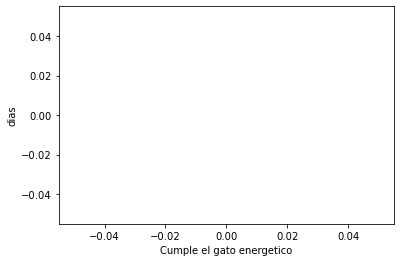

In [48]:
plt.plot(gastoenergetico)
plt.ylabel('dias')
plt.xlabel('Cumple el gato energetico')
plt.show()